In [1]:
#next task

#upgrade the program to be a multi-stock monitor 
import time 
from IPython.display import clear_output
from pandas_datareader import data as pdr
from datetime import datetime
# import plotly.express as px
import numpy as np 
from datetime import date, timedelta
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pyttsx3
import pandas as pd
yf.pdr_override() # <== that's all it takes :-)
df = pd.read_csv('Stock_WatchList.csv', sep='|')
tickers = df['Ticker']
mpl.rc('figure', figsize=(20,10))

def getSMA(days, tickers, graph = True):
    dic = {}
#     n = 200 + (len(tickers)//2+1)*10
    for i in range(len(tickers)):
        idx = i+1
        start = str(date.today() - timedelta(days))
        end = str(date.today())
        n = 300 + (len(tickers)//3+1)*10+ idx
        plt.subplot(n)
        Ticker = pdr.get_data_yahoo(tickers[i], start)
        percentile15 = np.percentile(Ticker['Adj Close'], 15)
        percentile85 = np.percentile(Ticker['Adj Close'], 85)
        Ticker['percentile15'] = percentile15
        Ticker['percentile85'] = percentile85
        if graph:
            Ticker['Adj Close'].plot(label = tickers[i], legend = True)
            Ticker['percentile15'].plot( label = "15th percentile", legend = True)
            Ticker['percentile85'].plot( label = "85th percentile", legend = True)
        print(tickers[i],":")
        print("15% percentile", percentile15)
        print("85% percentile", percentile85)
       
        dic[tickers[i]] = [percentile15,percentile85]
    if graph:
        plt.show()
    return pd.DataFrame(dic)

def convert_num_dollar(num):
    r  =  str(num)
    r = r.split('.')
    return r

[*********************100%***********************]  1 of 1 completed
ICU :
15% percentile 0.796999990940094
85% percentile 0.9777600049972534
[*********************100%***********************]  1 of 1 completed
HUBC :
15% percentile 0.6200000047683716
85% percentile 0.6843999981880188
[*********************100%***********************]  1 of 1 completed
VSME :
15% percentile 0.7408000111579895
85% percentile 1.1039999961853026
[*********************100%***********************]  1 of 1 completed
IBRX :
15% percentile 1.6240000247955322
85% percentile 3.228000020980835
[*********************100%***********************]  1 of 1 completed
TSLA :
15% percentile 201.8039978027344
85% percentile 215.70000305175782
[*********************100%***********************]  1 of 1 completed
RNAZ :
15% percentile 0.33280000686645506
85% percentile 0.40720000863075256
[*********************100%***********************]  1 of 1 completed
AMZN :
15% percentile 122.4239990234375
85% percentile 136.2179992675

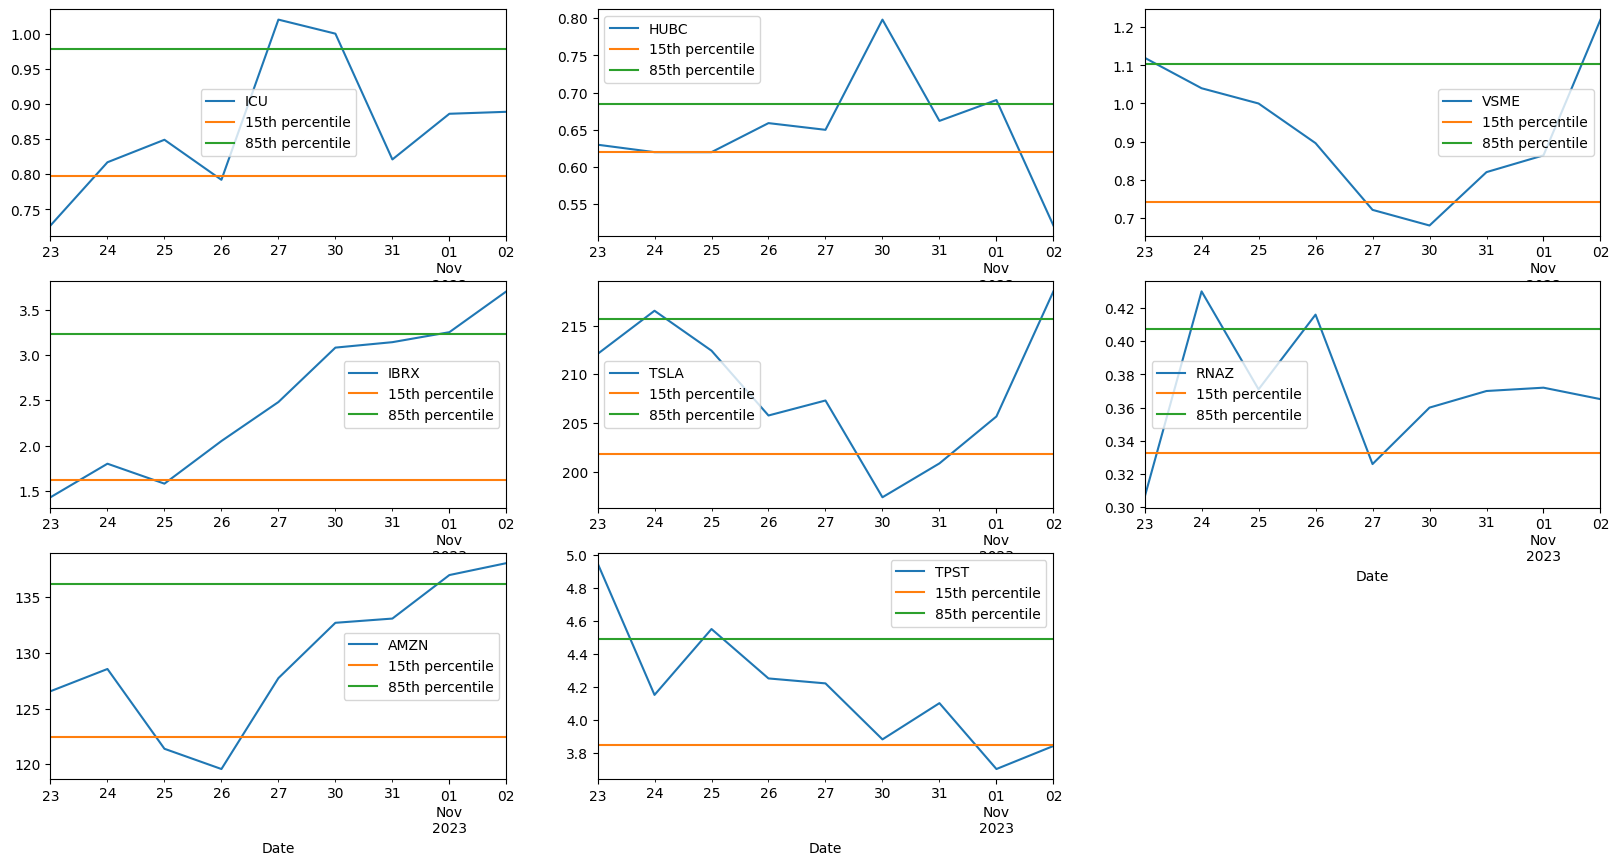

In [2]:
days = 10 
dic = getSMA(days, tickers)

In [3]:
dic

,ICU,HUBC,VSME,IBRX,TSLA,RNAZ,AMZN,TPST
0,0.79700,0.6200,0.7408,1.624,201.803998,0.3328,122.423999,3.848
1,0.97776,0.6844,1.1040,3.228,215.700003,0.4072,136.217999,4.490


In [4]:
df

,Ticker,Avg Cost,# of Share(s),Owned,checkEven,z
0,ICU,0.8784,350.0,False,True,1
1,HUBC,-,-,False,True,0
2,VSME,-,-,False,True,1
3,IBRX,-,-,False,True,1
4,TSLA,-,-,False,True,1
5,RNAZ,-,-,False,True,1
6,AMZN,-,-,False,True,1
7,TPST,-,-,False,True,0


In [5]:
engine = pyttsx3.init()
voices = engine.getProperty('voices')
newVoiceRate = 180
engine.setProperty('rate',newVoiceRate)
engine.setProperty('voice', voices[14].id) #changing index changes voices but ony 0 and 1 are working here


In [ ]:
z = 1
# PL = -62.78
check= True
timestamp = pd.to_datetime(datetime.now())

while True:
# timestamp.hour16: 
    df = pd.read_csv('Stock_WatchList.csv', sep='|')
    tickers = df['Ticker']
    days = 10 
    dic = getSMA(days, tickers, graph = False)
#     OwnedStock = df[df['Owned']]
#     WatchList = df[~df['Owned']]
    if check == True:
        check = False
        engine.say('Hi Fei, Multi-Stock monitor starts now!')
        engine.runAndWait()
#         if len(convert_num_dollar(PL))>1:
#             pl = convert_num_dollar(round(PL, 2))
#             cur = 'Your current Profit and Loss is '+ pl[0] +" $..Spot.. "+pl[1] + "cents."
#         else:
#             cur = 'Your current Profit and Loss is '+ str(PL) + "$"
#         print('Your current Profit and Loss is ',str(PL), "$")
#         engine.say(cur)
#         engine.runAndWait()
    
    for i in range(len(df)):
        ticker = df.loc[i,'Ticker']
        startP = df.loc[i,'Avg Cost']
        shares = df.loc[i,'# of Share(s)']
        owned = df.loc[i,'Owned']
        checkEven = df.loc[i,'checkEven']
        z = df.loc[i,'z']
        percent15 = dic[ticker].iloc[0]
        percent85 = dic[ticker].iloc[1]


        #checkEven = True
        
#tricky part - idea using the shares weight to calculate the P&L
#         Return = (PL/startP)
#         Return_Per = "{:.2%}".format(Return)
    
        try: 
            ticker_yahoo = yf.Ticker(ticker)
            data = ticker_yahoo.history()
            #data = yf.Ticker(ticker).info
            last_quote = data['Close'].iloc[-1]
            if not last_quote: 
                print("no last_quote!")
                break
        except:
            engine.say("Program cannot request stock info from yahoo finance!")
            print("Program cannot request stock info from yf! Auto quit!")
            engine.runAndWait()
            break
        if ticker == 'TSLA': ticker = 'TESLA'
        if owned: 
            if last_quote >= startP and checkEven and owned: 
                sent = "Hi Fei, it is the break even time!"
#                 engine.say(sent)
#                 engine.runAndWait()
                checkEven = False
        

        #print the result
        if last_quote <= percent15: 
            if z==1: 
                print(ticker, last_quote, '-BUY')
                if len(convert_num_dollar(last_quote))>1:
                    lq = convert_num_dollar(round(last_quote, 2))
                    buy = 'Time to BUY'+ticker +' @' + lq[0]+" $ SPOT "+ lq[1]+" cents."
                else:
                    buy ='Time to BUY'+ticker +' @'+ str(round(last_quote, 2)) +"$"
#                 engine.say(buy)
#                 engine.runAndWait()
#                 closeAdj = last_quote
#                 PL -= closeAdj
                df.loc[i,'z'] = 0 
        else:
            if last_quote >= percent85:
                if z ==0: 
                    print(ticker, last_quote, '-SELL')
                    if len(convert_num_dollar(last_quote))>1:
                        lq = convert_num_dollar(round(last_quote, 2))
                        sell = 'Time to Sell'+ticker +' @' + lq[0]+"$ SPOT "+ lq[1]+" cents."
                    else:
                        sell = 'Time to Sell'+ticker +' @' + str(round(last_quote, 2)) +"$"
                    sell = 'Time to Sell'+ticker +' @' + str(round(last_quote, 2)) +"$"
#                     engine.say(sell)
#                     engine.runAndWait()
#                     closeAdj = last_quote
#                     PL += closeAdj
#                     Return = (PL/startP)
#                     Return_Per =  "{:.2%}".format(Return)
#                     print("Total PNL for mean reversion strategy $", round(PL, 2))
#                     print("Total Return %",Return_Per, "\n")
                    df.loc[i,'z'] = 1
#         if len()
        if owned: 
            print(ticker,'\nCurrent Time',timestamp, '\nLast Price',last_quote,'\nyou current P&L is', round((last_quote - startP )*400,2),"$")
        else:
            print(ticker,'\nCurrent Time',timestamp, '\nLast Price',last_quote,'\n15th percentile:',round(percent15,4),' 85th percentile:',round(percent85,4),)
#     fig = px.scatter(dfICU, x='TimeStamp', y=(dfHUBC["Close"]-0.5779)*100,title='ICU Stock Move')
#     fig.update_yaxes(ticklabelposition="inside top", title=None)
#     fig.data[0].update(mode='markers+lines')
#     fig.show()
    timestamp = pd.to_datetime(datetime.now())
#     dfICU.loc[len(dfICU.index)] = [ticker,last_quote,timestamp] 
    time.sleep(5)
    
    clear_output(wait=True)
    df.to_csv('Stock_WatchList.csv', sep='|', index=False)
#     break
# print("Total PNL for mean reversion strategy is", round(PL, 2))
# print("Total Return %",Return_Per, "\n")
# res = "Total Return in percentage for mean reversion strategy is "+ str(Return_Per)
# engine.say(res)
# engine.say("good night!")
# engine.runAndWait()
    

[*********************100%***********************]  1 of 1 completed
ICU :
15% percentile 0.817799973487854
85% percentile 0.9777999997138976
[*********************100%***********************]  1 of 1 completed
HUBC :
15% percentile 0.5416000127792359
85% percentile 0.6843999981880188
[*********************100%***********************]  1 of 1 completed
VSME :
15% percentile 0.7408000111579895
85% percentile 1.0807199478149414
[*********************100%***********************]  1 of 1 completed
IBRX :
15% percentile 1.8499999523162842
85% percentile 3.6100000381469726
[*********************100%***********************]  1 of 1 completed
TSLA :
15% percentile 201.08099670410155
85% percentile 216.31500396728515
[*********************100%***********************]  1 of 1 completed
RNAZ :
15% percentile 0.35615999698638917
85% percentile 0.40720000863075256
[*********************100%***********************]  1 of 1 completed
AMZN :
15% percentile 121.70749931335449
85% percentile 136.8044998